# EDA of malnutrition dataset
## Introduction
Malnutrition is:
* inadequate quantity of vitamins, minerals in diet,
* being underweight, stunting or loss of appetite 
* obesity and overweights is also covered in malnutrition.

Primary culprit in adolescent death is malnutrition, and countries which have high rates of undernutrition. Now certain countries have started to show increasing rates of obesity.

## Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import tabulate to pretty print tables
from tabulate import tabulate

from google.colab import drive
drive.mount('/content/gdrive')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


## Defining the dataframe and printing the necessary summaries

In [2]:
def data_frame():
  """Reads the csv stored in the dataset folder, prints summaries such as head, shapes, dtypes etc.
  Returns the data_frame"""
  data1 = pd.read_csv('/content/gdrive/My Drive/datasets/malnutrition/dataset/country-wise-average.csv')
  data2 = pd.read_csv('/content/gdrive/My Drive/datasets/malnutrition/dataset/malnutrition-estimates.csv', index_col=0)
  data = (data1, data2)

  for data_frame in data:
    print("Printing summaries of data_frames. \n")
    print("The head of data is: \n")
    print(tabulate(data_frame.head(), headers='keys'))
    print("\nThe shape of country-wise-average data is:")
    print(data_frame.shape)
    print("\nThe dtypes of columns is:")
    print(data_frame.dtypes)
    print("\nThe null values in each column is:")
    print(data_frame.isnull().sum())
    print("\nThe summary of dataset is:")
    print(tabulate(data_frame.describe(), headers='keys'))
  # printing for 2nd dataset
  return (data1, data2)

df1, df2 = data_frame()

Printing summaries of data_frames. 

The head of data is: 

    Country        Income Classification    Severe Wasting    Wasting    Overweight    Stunting    Underweight    U5 Population ('000s)
--  -----------  -----------------------  ----------------  ---------  ------------  ----------  -------------  -----------------------
 0  AFGHANISTAN                        0           3.03333   10.35           5.125      47.775        30.375                    4918.56
 1  ALBANIA                            2           4.075      7.76          20.8        24.16          7.7                       232.86
 2  ALGERIA                            2           2.73333    5.94286       12.8333     19.5714        7.34286                  3565.21
 3  ANGOLA                             1           2.4        6.93333        2.55       42.6333       23.6                      3980.05
 4  ARGENTINA                          2           0.2        2.15          11.125      10.025         2.6                  

## Cleaning data
* Removing unwanted columns
* Manipulating NA values, either to remove them or to replace with median value.

In [3]:
# Filling NA of 'Severe Wasting' with median
df1['Severe Wasting'] = df1['Severe Wasting'].fillna(df1['Severe Wasting'].median())

# dropping rows with NA from df1
df1 = df1.dropna()
print(df1.shape)

(148, 8)


In [4]:
# Filling NA of 'Severe Wasting', 'Underweight', 'overweight' with median
col = ['Severe Wasting', 'Underweight', 'Overweight']
for name in col:
  df2[name] = df2[name].fillna(df2[name].median())

# Dropping rest of the NA values
df2 = df2.dropna(subset=['Survey Sample (N)', 'Wasting', 'Stunting'])

# Changing NA in Notes to, "No Notes"
df2['Notes'] = df2['Notes'].fillna("No Notes")
print(df2.isna().sum())
print(df2.shape)

ISO code                 0
Country                  0
Survey Year              0
Year                     0
Income Classification    0
LDC                      0
LIFD                     0
LLDC or SID2             0
Survey Sample (N)        0
Severe Wasting           0
Wasting                  0
Overweight               0
Stunting                 0
Underweight              0
Notes                    0
Report Author            0
Source                   0
Short Source             0
U5 Population ('000s)    0
dtype: int64
(821, 19)


## Separating categorical and numerical data.

Certain functions only appy to numerical data and therefore it would be nice to have a separate numerical and categorical columns for each data_frame.

In [5]:
# Creating a function to separate columns based on dtypes.
def cat_columns(df):
  """
  Takes data_frame as argument and returns data_frame with all categorical columns.
  """
  return list(df.select_dtypes(include = ['category', 'object']))

def num_columns(df):
  """
  Takes data_frame as argument and returns data_frame with all categorical columns.
  """
  return list(df.select_dtypes(exclude = ['category', 'object']))

cat_col_df1 = cat_columns(df1)
num_col_df1 = num_columns(df1)
cat_col_df2 = cat_columns(df2)
num_col_df2 = num_columns(df2)


## Dealing with outliers using standard score
If Z(standard score) is > 3 or < -3, the observation is declared as an outlier.


In [6]:
# importing stats from scipy
from scipy import stats

In [7]:
# z-score for num_col_df1
df1_zscore = df1[num_col_df1].apply(stats.zscore)
print(tabulate(df1_zscore.describe(), headers='keys'))

# z-score for num_col_df2
df2_zscore = df2[num_col_df2].apply(stats.zscore)
print(tabulate(df2_zscore.describe(), headers='keys'))

         Income Classification    Severe Wasting        Wasting     Overweight       Stunting    Underweight    U5 Population ('000s)
-----  -----------------------  ----------------  -------------  -------------  -------------  -------------  -----------------------
count            148               148            148            148            148            148                      148
mean              -1.30526e-16      -2.18294e-16    1.13273e-16   -2.55801e-16    2.02541e-17    3.26316e-17             -2.21294e-17
std                1.0034            1.0034         1.0034         1.0034         1.0034         1.0034                   1.0034
min               -1.46785          -1.29872       -1.48011       -1.33951       -1.72238       -1.2363                  -0.310148
25%               -0.423418         -0.743192      -0.746714      -0.727656      -0.83493       -0.849625                -0.292028
50%               -0.423418         -0.169013      -0.192906      -0.194979      -0

In [8]:
# printing outliers (Z>3, Z<-3) data
print((df1_zscore[(df1_zscore > 3) | (df1_zscore < -3)]).count())
print("\n")
print((df2_zscore[(df2_zscore > 3) | (df2_zscore < -3)]).count())

Income Classification    0
Severe Wasting           2
Wasting                  1
Overweight               2
Stunting                 0
Underweight              0
U5 Population ('000s)    2
dtype: int64


Year                      0
Income Classification     0
LDC                       0
LIFD                      0
LLDC or SID2              0
Severe Wasting           15
Wasting                   6
Overweight               14
Stunting                  0
Underweight              10
U5 Population ('000s)    20
dtype: int64


### Analysis
* There are few outliers in the dataset.

## Converting 'income classification' column to names.
* Converting first to int.

In [9]:
# df1['Income Classification'] = df1['Income Classification'].astype('int')

* Converting values

In [10]:
# df1.loc[df1['Income Classification'] == 0, 'Income Classification'] = 'Low Income'
# df1.loc[df1['Income Classification'] == 1, 'Income Classification'] = 'Lower-middle Income'
# df1.loc[df1['Income Classification'] == 2, 'Income Classification'] = 'Higher-middle Income'
# df1.loc[df1['Income Classification'] == 3, 'Income Classification'] = 'High Income'
# df1['Income Classification'].head()

* plotting values

[Text(0, 0, 'Low Income'),
 Text(0, 0, 'Lower-middle Income'),
 Text(0, 0, 'Higher-middle Income'),
 Text(0, 0, 'High Income')]

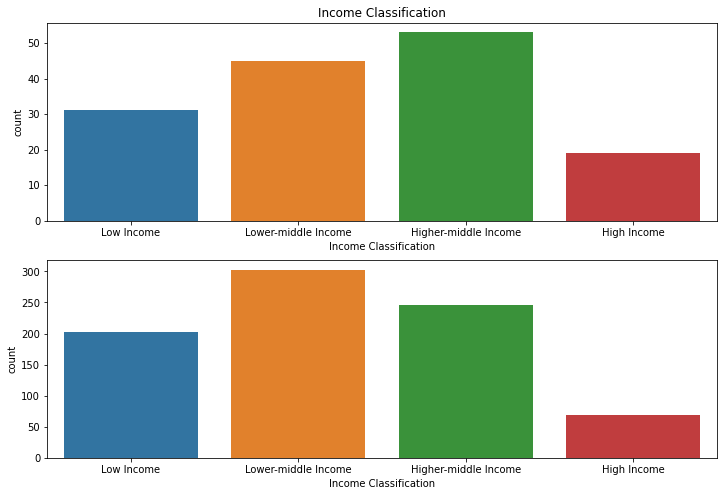

In [11]:
fig = plt.figure(figsize= (12,8))
ax1 = plt.subplot(211)
ax2 = plt.subplot(212)
sns.countplot(data=df1, x = 'Income Classification', ax=ax1).set_title('Income Classification')
ax1.set_xticklabels(['Low Income', 'Lower-middle Income', 'Higher-middle Income', 'High Income'])
# plt.setp(ax1.get_xticklabels(), rotation=45)

sns.countplot(data=df2, x = 'Income Classification', ax=ax2)
ax2.set_xticklabels(['Low Income', 'Lower-middle Income', 'Higher-middle Income', 'High Income'])
# plt.setp(ax2.get_xticklabels(), rotation=45)


## Wasting vs Income Classification
Wasting can be described, an onset of quick weight loss due to severe under-nutrition.

[Text(0, 0, 'Low Income'),
 Text(0, 0, 'Lower-middle Income'),
 Text(0, 0, 'Higher-middle Income'),
 Text(0, 0, 'High Income')]

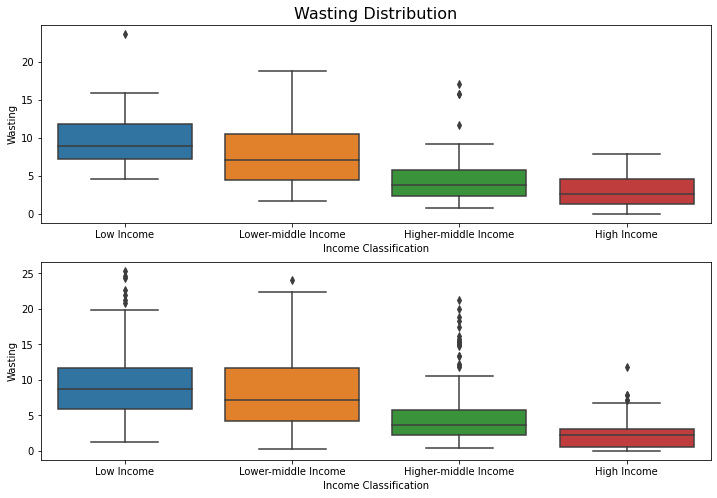

In [12]:
fig = plt.figure(figsize=(12,8))
ax1 = plt.subplot(211)
ax2 = plt.subplot(212)
sns.boxplot(data=df1, y='Wasting', x='Income Classification', ax = ax1).set_title("Wasting Distribution", fontsize = 16)
sns.boxplot(y='Wasting', x='Income Classification', data=df2, ax = ax2)

ax1.set_xticklabels(['Low Income', 'Lower-middle Income', 'Higher-middle Income', 'High Income'])
ax2.set_xticklabels(['Low Income', 'Lower-middle Income', 'Higher-middle Income', 'High Income'])

### Analysis
Wasting is high in countries with Low or Lower-middle Income.

### Overweight vs Income Classification
Overweight can be described as a condition where the Body Mass Index is higher than for normal person.

Text(0.5, 0.92, 'Overweight vs Income Classification')

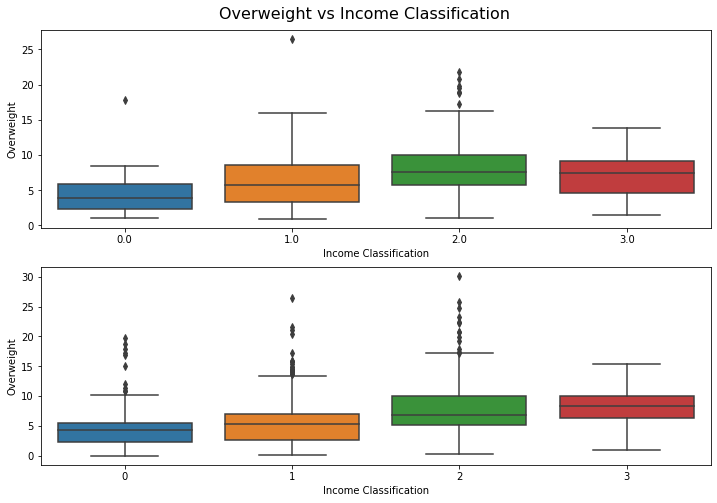

In [13]:
fig = plt.figure(figsize=(12,8))
ax1 = plt.subplot(211)
ax2 = plt.subplot(212)
sns.boxplot('Income Classification', 'Overweight', data=df1, ax=ax1)
sns.boxplot('Income Classification', 'Overweight', data=df2, ax=ax2)
plt.suptitle("Overweight vs Income Classification", fontsize=16, y=0.92)

### Analysis
* Higher earning countries have higher rate of obesity.

## Stunting vs Income Distribution
* Stunting is low height of children for a particular weight.

Text(0.5, 0.92, 'Stunting vs Income Classification')

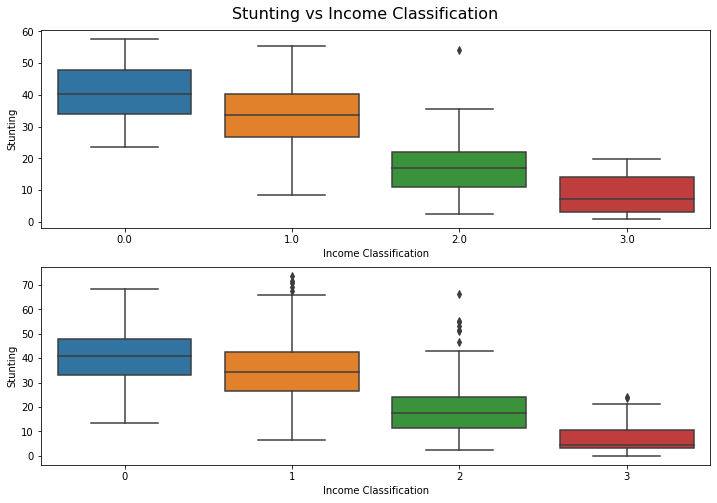

In [14]:
fig = plt.figure(figsize=(12,8))
ax1 = plt.subplot(211)
ax2 = plt.subplot(212)
sns.boxplot('Income Classification', 'Stunting', data=df1, ax=ax1)
sns.boxplot('Income Classification', 'Stunting', data=df2, ax=ax2)
plt.suptitle("Stunting vs Income Classification", fontsize=16, y=0.92)

### Analysis
* Stunting is high for economically poor countries, while it decreases with increase in income.

## Underweight vs Income Classification

Text(0.5, 0.98, 'Underweight vs Income Classification')

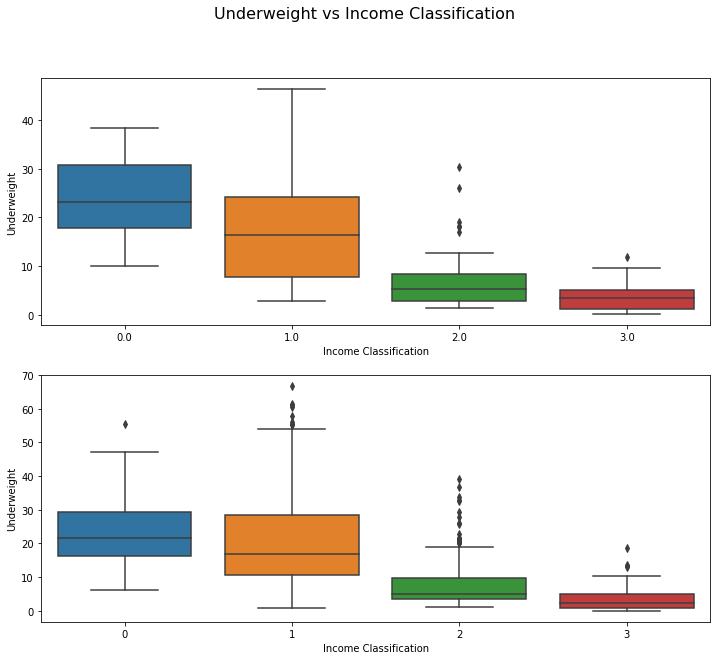

In [15]:
fig = plt.figure(figsize=(12,10))
sns.boxplot('Income Classification', 'Underweight', data=df1, ax=plt.subplot(211))
sns.boxplot('Income Classification', 'Underweight', data=df2, ax=plt.subplot(212))
plt.suptitle("Underweight vs Income Classification", fontsize=16)

### Analysis
* Underweight is higher for lower income countries.

## Analysis of individual countries

Plotting time series plots to visualise the change in severe wasting, wasting, overweight, stunting, and underweight.

### India


In [16]:
values = ['Year', 'Severe Wasting', 'Wasting', 'Overweight', 'Stunting', 'Underweight']
India = df2[df2['Country'] == 'INDIA'][values]
India.set_index('Year', drop=True, inplace=True)
print(India.info)

<bound method DataFrame.info of       Severe Wasting  Wasting  Overweight  Stunting  Underweight
Year                                                            
1989             1.6     20.3         5.5      62.7         55.5
1992             1.6     20.0         5.5      61.9         52.8
1993             7.0     19.9         2.9      57.7         51.2
1997             1.6     18.4         5.9      45.9         38.4
1999             5.7     17.1         2.9      54.2         46.3
2006             6.8     20.0         1.9      47.8         43.5
2014             4.6     15.1         5.5      38.7         29.4
2015             7.7     20.8         2.4      37.9         36.3>


Text(0.5, 0.9, 'Time series plot for malnutrition, India')

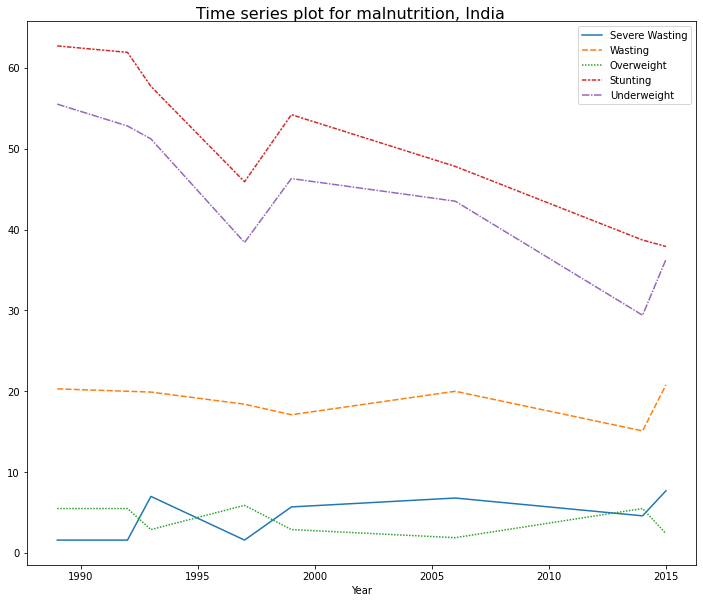

In [17]:
fig = plt.figure(figsize=(12,10))
sns.lineplot(data=India)
plt.suptitle('Time series plot for malnutrition, India', fontsize=16, y=0.9)

#### Analysis
* Stunting and Underweight has dropped over the years, while Wasting and Severe Wasting remain the same.

### United States (US)

In [18]:
US = df2[df2['Country'] == 'UNITED STATES OF AMERICA (THE)'][values]
US.set_index('Year', drop=True, inplace=True)
print(US.info)

<bound method DataFrame.info of       Severe Wasting  Wasting  Overweight  Stunting  Underweight
Year                                                            
1991             0.1      0.7         5.4       3.2          0.9
2001             0.0      0.4         7.0       3.3          1.1
2005             0.1      0.8         8.1       3.2          1.1
2009             0.0      0.5         7.8       2.7          0.8
2012             0.0      0.5         6.0       2.1          0.5>


Text(0.5, 0.9, 'Time series plot for Malnutrition, USA')

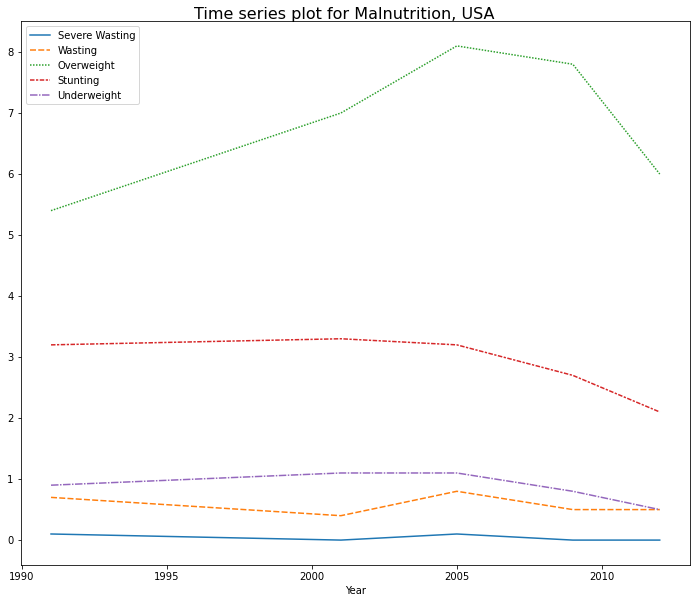

In [19]:
plt.figure(figsize=(12,10))
sns.lineplot(data=US)
plt.suptitle("Time series plot for Malnutrition, USA", fontsize=16, y=0.9)

#### Analysis
* Obesity is quite high in US, but the numbers are decreasing now.


### Bangladesh

In [20]:
BAN = df2[df2['Country'] == 'BANGLADESH'][values]
BAN.set_index('Year', inplace=True, drop=True)
print(BAN.info)

<bound method DataFrame.info of       Severe Wasting  Wasting  Overweight  Stunting  Underweight
Year                                                            
1986             1.6     17.3         0.2      70.9         66.8
1990             1.6     17.5         0.6      63.4         61.5
1991             2.6     15.2         0.3      73.6         61.2
1992             3.0     16.1         0.2      71.5         60.6
1993             2.5     14.0         0.4      69.2         56.1
1994             3.2     16.7         0.2      67.3         58.0
1995             2.7     15.1         0.2      65.8         55.2
1996             2.8     15.5         0.3      63.8         54.0
1997             6.8     20.7         2.4      59.6         53.6
1998             2.3     15.0         0.2      59.3         50.7
1999             2.0     13.7         0.6      59.9         49.5
2000             2.5     12.5         0.9      51.1         42.4
2001             2.3     12.7         0.9      53.2       

Text(0.5, 0.9, 'Time series plot for Malnutrition, Bangladesh')

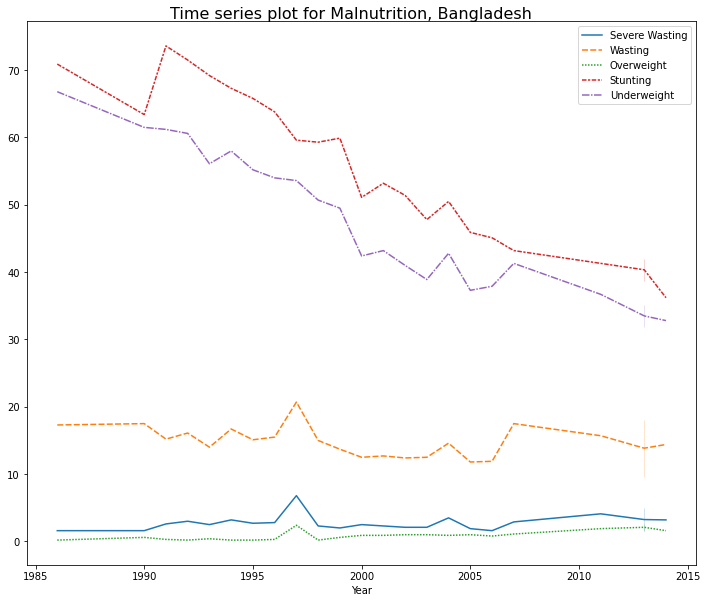

In [21]:
fig = plt.figure(figsize=(12,10))
sns.lineplot(data=BAN)
plt.suptitle("Time series plot for Malnutrition, Bangladesh", fontsize=16, y=0.9)

#### Analysis
* Malnutrition are constantly going down over the years in Bangladesh.

### Summary
* Low income countries have high percentage of Underweight, Stunting and Wasting, while high income countires have higher percentage of Overweight form of malnutrition.